In [18]:
import matplotlib.pyplot as plt
import numpy as np
import urllib
import matplotlib.dates as mdates

In [19]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

In [20]:
def graph_data(stock):

    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'

    source_code = urllib.request.urlopen(stock_price_url).read().decode()

    stock_data = []
    split_source = source_code.split('\n')

    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line:
                stock_data.append(line)
    
    
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                          converters={0: bytespdate2num('%Y-%m-%d')})
    plt.plot_date(date, closep,'-', label='Price')
 
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Interesting Graph\nCheck it out')
    plt.legend()
    plt.show()

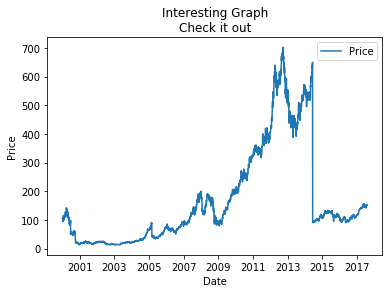

In [21]:
graph_data('TSLA')